# Pymaceuticals Inc.
---

### Analysis
three inferences that could be made from the data shown here are
1)capolmulin may be effective for a small time period in reducing the size of a mouse's tumor
2)most treatments arern't very effective in reducing tumor size
3) More data is required to make clear assumptions about the results of the study. male mice are represented in the study more, but not by much. It could be a statistical error that could swit0ch back and forth between sexes depending on the size of the data.  if more data was ingested we could determine other factors like predisposed likleyhood that a tumor will occur. maybe the lab was contaminated on one side of the room with abnormal amounts of radiation that affected only a percentage of the mice, causing their tumors to grow more rapidly despite the varied treatments.
 

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_df=pd.merge(mouse_metadata,study_results, how="inner", on ="Mouse ID")
# Display the data table for preview


In [4]:
mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Checking the number of mice.
num_maus=(mouse_df['Mouse ID'].nunique())
num_maus

249

In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_maus = mouse_df.loc[mouse_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
dup_maus

array(['g989'], dtype=object)

In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mausID = mouse_df.set_index(['Mouse ID'])
dup_mausID

dup_mausID.loc['g989']

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,5,48.786801,0
g989,Propriva,Female,21,26,5,47.570392,0
g989,Propriva,Female,21,26,10,51.745156,0
g989,Propriva,Female,21,26,10,49.880528,0
g989,Propriva,Female,21,26,15,51.325852,1
g989,Propriva,Female,21,26,15,53.442020,0
g989,Propriva,Female,21,26,20,55.326122,1


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_maus_df=mouse_df.loc[mouse_df['Mouse ID'] != 'g989']

In [9]:
# Checking the number of mice in the clean DataFrame.
new_num_maus=(clean_maus_df['Mouse ID'].nunique())
new_num_maus

248

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
drug_regimen = clean_maus_df.groupby(['Drug Regimen'])
mean = clean_maus_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean()
median = clean_maus_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median()
var = clean_maus_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var()
std_dev = clean_maus_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std()
sem = clean_maus_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem()

pillz_df_summary= pd.DataFrame({"SEM":sem,"standard deviation":std_dev,"Variance":var,"median":median,"mean":mean})
pillz_df_summary



,SEM,standard deviation,Variance,median,mean
Drug Regimen,,,,,
Capomulin,0.329346,4.994774,24.947764,41.557809,40.675741
Ceftamin,0.469821,6.268188,39.290177,51.776157,52.591172
Infubinol,0.492236,6.567243,43.128684,51.820584,52.884795
Ketapril,0.603860,8.279709,68.553577,53.698743,55.235638
Naftisol,0.596466,8.134708,66.173479,52.509285,54.331565
Placebo,0.581331,7.821003,61.168083,52.288934,54.033581
Propriva,0.544332,6.622085,43.852013,50.446266,52.320930
Ramicane,0.320955,4.846308,23.486704,40.673236,40.216745
Stelasyn,0.573111,7.710419,59.450562,52.431737,54.233149


In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
pillz_summary_agg = clean_maus_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])
pillz_summary_agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Timeline')

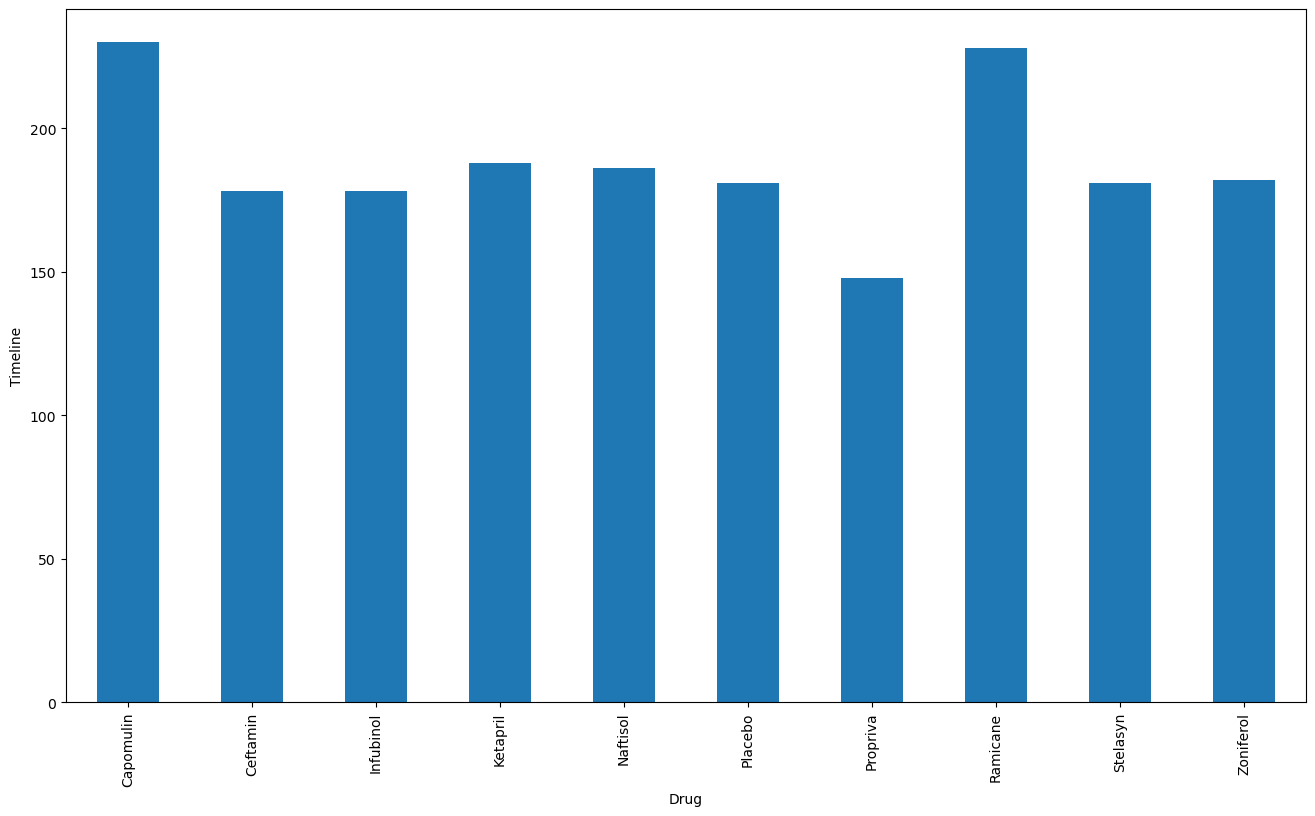

In [12]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

time=clean_maus_df.groupby('Drug Regimen')['Timepoint'].count()

timeplot=time.plot(kind='bar', figsize=(16,9))
timeplot.set_xlabel("Drug")

timeplot.set_ylabel("Timeline")

Text(0, 0.5, 'Timeline')

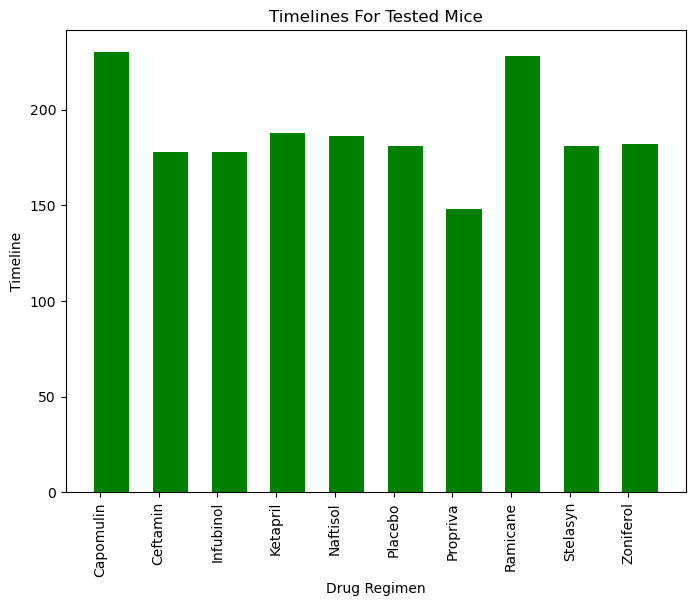

In [13]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

regimen = ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"]
timepoints_2 = clean_maus_df.groupby('Drug Regimen')['Timepoint'].count()
x_axis = np.arange(len(timepoints_2))
ticks = [value+0.1 for value in x_axis]
plt.figure(figsize=(8,6))
plt.bar(x_axis, timepoints_2, color='green', alpha=1, align='edge', width=0.6)
plt.xticks(ticks, regimen, rotation='vertical')
plt.title('Timelines For Tested Mice')
plt.xlabel('Drug Regimen')
plt.ylabel('Timeline')



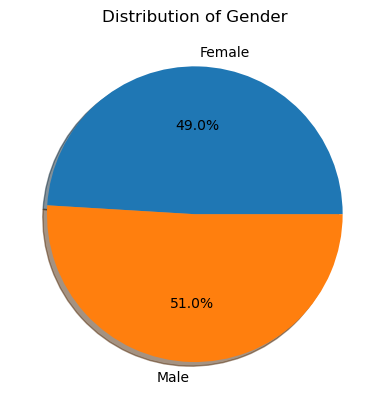

<Figure size 640x480 with 0 Axes>

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pie_plot = clean_maus_df.groupby("Sex")
pie_plot
sex = pie_plot['Sex'].count()
pie_chart = sex.plot(kind="pie",shadow=True,autopct='%1.1f%%',title="Distribution of Gender")
pie_chart.set_xlabel("")
pie_chart.set_ylabel("")

plt.show()
plt.tight_layout()


([<matplotlib.patches.Wedge at 0x20056d64100>,
 [Text(0.036089469908307935, 1.1994571897995099, 'Female'),
  Text(-0.0330820140826155, -1.0995024239828841, 'Male')],
 [Text(0.02105219077984629, 0.6996833607163808, '49.0%'),
  Text(-0.018044734954153905, -0.5997285948997549, '51.0%')])

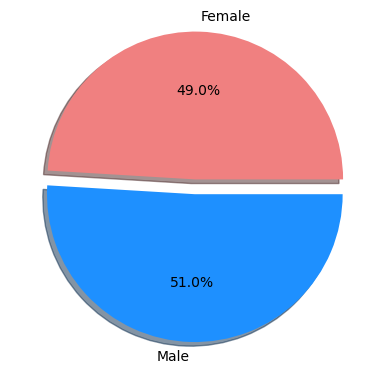

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pie_plot_2 = clean_maus_df.groupby("Sex")
pie_plot_2
sex_2 = pie_plot['Sex'].count()
labels = ['Female', 'Male']
colors = ['lightcoral', 'dodgerblue']
plt.pie(sex_2, explode=(0.1,0), labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True)



## Quartiles, Outliers and Boxplots

In [18]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
final_tumor_volume = clean_maus_df[clean_maus_df['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]

# Start by getting the last (greatest) timepoint for each mouse
timepoint_max = final_tumor_volume.groupby(['Mouse ID','Drug Regimen']).max('Timepoint').reset_index()
timepoint_max_df = pd.DataFrame(timepoint_max)
timepoint_max_df

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_timepoint_df = timepoint_max[['Mouse ID', 'Timepoint']].merge(clean_maus_df, on=['Mouse ID', 'Timepoint'], how='left')
last_timepoint_df.head(15)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0
5,a520,45,Ramicane,Male,13,21,38.810366,1
6,a577,30,Infubinol,Female,6,25,57.031862,2
7,a644,45,Ramicane,Female,7,17,32.978522,1
8,a685,45,Infubinol,Male,8,30,66.083066,3
9,b128,45,Capomulin,Female,9,22,38.982878,2


In [26]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
# Create empty list to fill with tumor vol data (for plotting)
tumor_list=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volume = last_timepoint_df.loc[last_timepoint_df['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']

    
    # add subset 
    tumor_list.append(treatment)
    
    # Determine outliers using upper and lower bounds
    quartile = final_tumor_volume.quantile([0.25,0.5,0.75])
    lowerq = quartile[0.25]
    upperq = quartile[0.75]
    iqr = upperq-lowerq
    


KeyError: 0.25

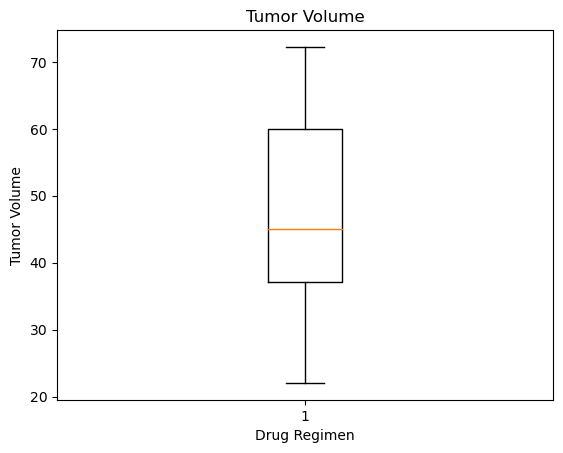

In [22]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
treatment = last_timepoint_df['Tumor Volume (mm3)']

fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume')
ax1.set_xlabel('Drug Regimen')
ax1.set_ylabel('Tumor Volume')
ax1.boxplot(treatment)
plt.show()



## Line and Scatter Plots

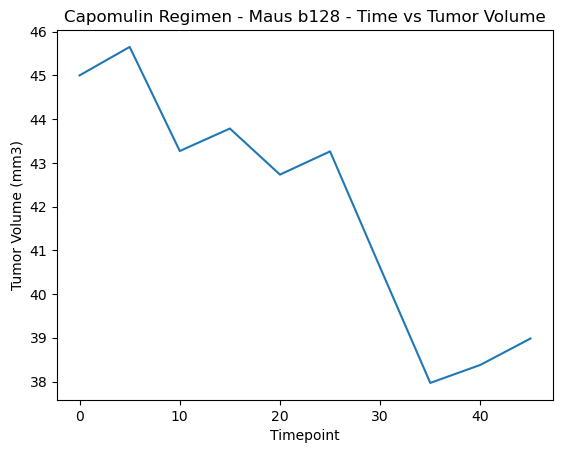

In [23]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

capomulin = clean_maus_df[clean_maus_df['Mouse ID'].isin(['b128'])]
capomulin #prints dataframe for data for mouse 'b128'

#create x and y axis values
x_axis = capomulin['Timepoint']
y_axis = capomulin['Tumor Volume (mm3)']

#name graph axis labels 
plt.title("Capomulin Regimen - Maus b128 - Time vs Tumor Volume")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")

#plot line plot
plt.plot(x_axis, y_axis)
plt.show()

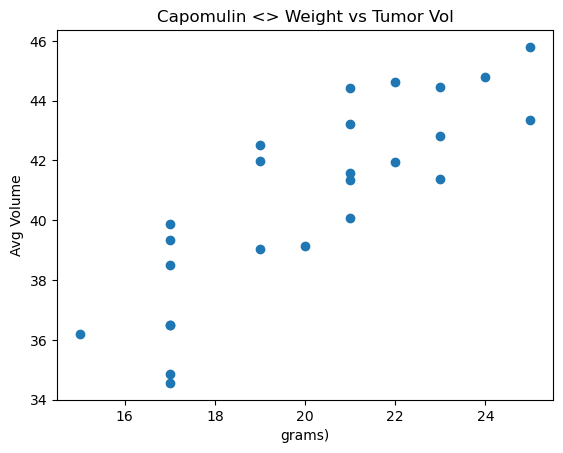

In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin = clean_maus_df[clean_maus_df['Drug Regimen'].isin(['Capomulin'])]
capomulin #prints dataframe for all mice treated with Capomulin

#create x and y axis values
weight = capomulin.groupby('Mouse ID')['Weight (g)'].mean()
tumor = capomulin.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

#name graph axis labels 
plt.title("Capomulin <> Weight vs Tumor Vol")
plt.xlabel("grams)")
plt.ylabel("Avg Volume")

#plot scatter plot
plt.scatter(weight, tumor)
plt.show()


## Correlation and Regression

The correlation between factors is 0.84


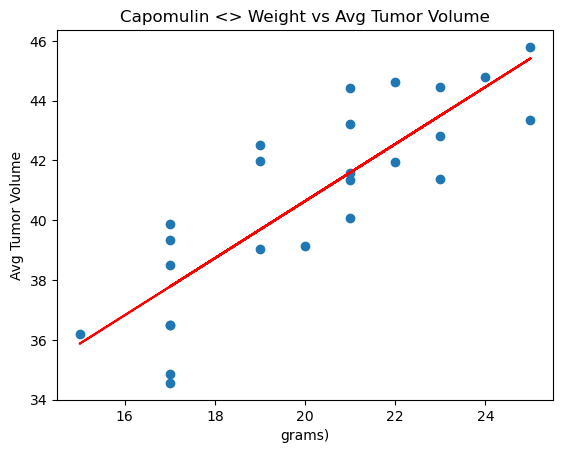

In [24]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
capomulin = clean_maus_df[clean_maus_df['Drug Regimen'].isin(['Capomulin'])]
capomulin


from scipy.stats import linregress

#create x and y axis values
weight_x = capomulin.groupby('Mouse ID')['Weight (g)'].mean()
tumor_y = capomulin.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

#Pearson correlation coefficient 
correlation = st.pearsonr(weight_x,tumor_y)
print(f"The correlation between factors is {round(correlation[0],2)}")

#linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(weight_x, tumor_y)
regress_values = weight_x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.title("Capomulin <> Weight vs Avg Tumor Volume")
plt.xlabel('grams)')
plt.ylabel('Avg Tumor Volume')

##scatter plot
plt.scatter(weight_x,tumor_y)
plt.plot(weight_x,regress_values,"r-")
plt.annotate(line_eq,(5,0.8),fontsize=9,color="orange")
plt.show()
